<a href="https://colab.research.google.com/github/greyboi9/QxQ-homeworks/blob/main/QXQ_Week_8_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 8: Multi-Qubit Circuits**
---

### **Description**
In this week's assignment, you will create and work with multi-qubit circuits. You will begin by reviewing how to build quantum circuits and apply quantum gates to those circuit. Then you will apply these skills to creating, simulating, and visualizing the measurement results of multi-qubit circuits.

<br>

### **Lab Structure**
**Part 1**: [Single-Qubit Circuit Review](#p1)

**Part 2**: [Multi-Qubit Circuits](#p2)

<br>


### **Learning Objectives**
By the end of this notebook, we will:
1. Recognize how to implement multi-qubit circuits, including the CNOT gate, in Cirq.
2. Recognize how to simulate and interpret measurement results in Cirq.

<br>

###**Resources**
* [Cirq Basics Cheat Sheet](https://docs.google.com/document/d/1j0vEwtS6fK-tD1DWAPry4tJdxEiq8fwMtXuYNGRhK_M/edit?usp=drive_link)

<br>


**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
# @title
!pip install cirq --quiet
import cirq
import cirq_web
import numpy as np
import cirq_web.bloch_sphere as bloch_sphere
import matplotlib.pyplot as plt
def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]
print("Libraries imported successfully!")

Libraries imported successfully!


<a name="p1"></a>

---
## **Part 1: Single-Qubit Circuit Review**
---

### **Problem #1.1**

1. Create a qubit.
2. Create an empty quantum circuit.
3. Append the qubit you created to the empty quantum circuit with an **H Gate** applied to it.
4. Then print out the circuit.
5. Print out the state vector, dirac notation, and bloch sphere of the qubit in the quantum circuit.

In [ ]:
qubit = cirq.NamedQubit("q0")
my_circuit = cirq.Circuit( )
my_circuit.append(cirq.H(qubit))
print(my_circuit)

q0: ───H───


In [ ]:
state_vector = cirq.final_state_vector(my_circuit)
ket = cirq.dirac_notation( state_vector=state_vector )

print( state_vector, ket )
bloch_sphere.BlochSphere( state_vector=state_vector )

[0.70710677+0.j 0.70710677+0.j] 0.71|0⟩ + 0.71|1⟩


### **Problem #1.2**
Append a measurement to your circuit from problem #1.1. Output the circuit. Simulate the results of your circuit.

In [ ]:
my_circuit.append(cirq.measure(qubit))
my_circuit

q0: ───H───M───

In [ ]:
sim = cirq.Simulator()
result = sim.run(my_circuit)
result

q0=0

###**Problem #1.3**
Simulate the results of your circuit from Problem #1.2 10 times. Output the results. Simulate the results of your circuit.

In [ ]:
sim = cirq.Simulator()
result = sim.run(my_circuit, repetitions = 10)
result

q0=0111100010

###**Problem #1.4**
1. Append the below circuit such that the qubit will end in the 0 state.
2. Append a measurement to your circuit
3. Print out the circuit.
4. Simulate the result of your circuit 500 times and output the results to ensure that the qubit is in the 0 state.

In [ ]:
my_qubit = cirq.NamedQubit("q0")
my_circuit = cirq.Circuit( )
my_circuit.append(cirq.H(my_qubit))
my_circuit.append(cirq.Z(my_qubit))
print(my_circuit)

q0: ───H───Z───


In [ ]:
my_circuit.append(cirq.H(my_qubit))
my_circuit.append(cirq.X(my_qubit))
my_circuit.append(cirq.measure(my_qubit))
my_circuit

q0: ───H───Z───H───X───M───

In [ ]:
sim = cirq.Simulator()
result = sim.run(my_circuit, repetitions = 500)
result

q0=00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

<a name="p2"></a>

---
## **Part 2: Multi-Qubit Circuits**
---

###**Problem #2.1**
Create three qubits and append a measurement to each qubit. Output your circuit. Simulate the results of your circuit.

In [ ]:
my_qubits = cirq.NamedQubit.range(3, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.measure(my_qubits))
my_circuit

q0: ───M───
       │
q1: ───M───
       │
q2: ───M───

In [ ]:
sim = cirq.Simulator()
result = sim.run(my_circuit)
result

q0,q1,q2=0, 0, 0

###**Problem #2.2**
Create three qubits and append an H gate to each qubit. Output your circuit. Give the ket representation of the final state vectors of your circuit.

In [ ]:
my_qubits = cirq.NamedQubit.range(3, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H.on_each(my_qubits))
my_circuit

q0: ───H───

q1: ───H───

q2: ───H───

In [ ]:
vec = cirq.final_state_vector(my_circuit)
cirq.dirac_notation(vec)

'0.35|000⟩ + 0.35|001⟩ + 0.35|010⟩ + 0.35|011⟩ + 0.35|100⟩ + 0.35|101⟩ + 0.35|110⟩ + 0.35|111⟩'

###**Problem #2.3**
Create three qubits and append an H gate to the first qubit, an X gate to the second, and a Z gate to the third. Output your circuit.

In [ ]:
my_qubits = cirq.NamedQubit.range(3, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H(my_qubits[0]))
my_circuit.append(cirq.X(my_qubits[1]))
my_circuit.append(cirq.Z(my_qubits[2]))
my_circuit

q0: ───H───

q1: ───X───

q2: ───Z───

###**Problem #2.4**
Using the same circuit as Problem #2.3, append a Z gate to the first qubit, an H gate to the second, and an X gate to the third. Output your circuit.

In [ ]:
my_circuit.append(cirq.H(cirq.NamedQubit("q1")))
my_circuit.append(cirq.X(cirq.NamedQubit("q2")))
my_circuit.append(cirq.Z(cirq.NamedQubit("q0")))
my_circuit

q0: ───H───Z───

q1: ───X───H───

q2: ───Z───X───

###**Problem #2.5**
Using the same circuit as Problem #2.4, append an X gate to the first qubit, a Z gate to the second, and an H gate to the third. Finally, append a measurement to each qubit. Output your circuit. Simulate the results of your circuit 10,000 times and create a histogram of the results.

<br>

**NOTE**: If you want to rerun your solution to this problem, you will need to rerun your solutions to Problems #2.3 - 2.4 first.

In [ ]:
my_circuit.append(cirq.Z(cirq.NamedQubit("q1")))
my_circuit.append(cirq.H(cirq.NamedQubit("q2")))
my_circuit.append(cirq.X(cirq.NamedQubit("q0")))
my_circuit.append(cirq.measure(my_qubits))
my_circuit

q0: ───H───Z───X───M───
                   │
q1: ───X───H───Z───M───
                   │
q2: ───Z───X───H───M───

In [ ]:
000, 001, 010, 011, 100, 101, 111

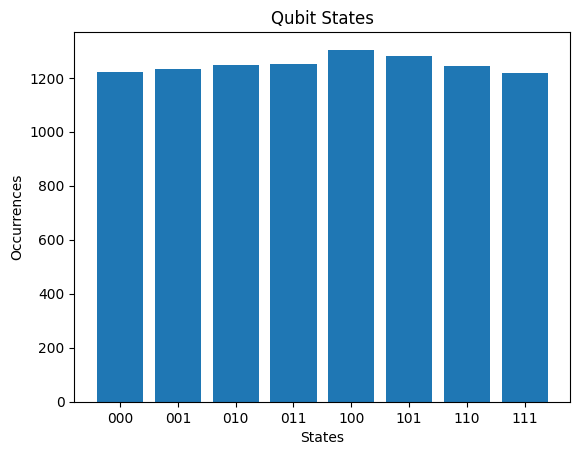

In [ ]:
sim = cirq.Simulator()
result = sim.run(my_circuit, repetitions=10000)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))
plt.show()

###**Problem #2.6**

Create two qubits. Create a circuit and add a CNOT gate such the the first qubit is the control and the second is the target. Output your circuit. Print out the ket representation of your circuit's final state.

In [ ]:
my_qubits = cirq.NamedQubit.range( 2, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.CNOT(cirq.NamedQubit("q0"), cirq.NamedQubit("q1")))
my_circuit

q0: ───@───
       │
q1: ───X───

In [ ]:
state_vector = cirq.final_state_vector(my_circuit)
ket = cirq.dirac_notation( state_vector=state_vector )
print(ket)

|00⟩


###**Problem #2.7**

Create two qubits. Create a circuit and add an H gate to the first qubit, an X gate to the second qubit, then a CNOT gate such the the first qubit is the control and the second is the target. Measure both qubits in the end. Output your circuit. Simulate the results of your circuit 10000 times and create a histogram of the results.

In [ ]:
my_qubits = cirq.NamedQubit.range( 2, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H(cirq.NamedQubit("q0")))
my_circuit.append(cirq.X(cirq.NamedQubit("q1")))
my_circuit.append(cirq.CNOT(cirq.NamedQubit("q0"), cirq.NamedQubit("q1")))
my_circuit.append(cirq.measure(my_qubits))
my_circuit

q0: ───H───@───M───
           │   │
q1: ───X───X───M───

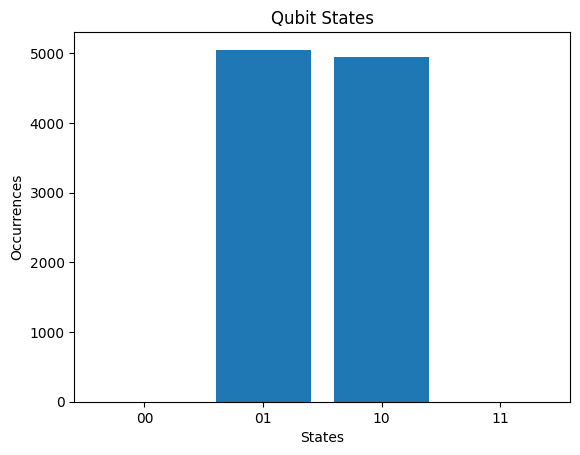

In [ ]:
sim = cirq.Simulator()
result = sim.run(my_circuit, repetitions=10000)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))
plt.show()

#End of notebook
---
© 2023 The Coding School, All rights reserved